Breast canser

In [74]:
# importing library 
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

Step 2 Reading the Dataset

In [2]:
# Read dataset
df = pd.read_csv('data.csv')

In [5]:
# Remove missing values
df = df.fillna(0)
df.shape

(569, 33)

Step 3 Dropping Unnecessary Columns

In [6]:
df.head(5)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

      ...       texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0     ...               17.33           184.60      2019.0            0.1622   
1     ...               23.41           158.80      1956.0            0.1238   
2     ...               25.53           152.50      1709.0            0.1444   
3     ...               26.50            98.87       567.7            0.2098   
4     ...               16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          0.0  
1                  0.08902          0.0  
2                  0.08758          0.0  
3                  0.17300          0.0  
4                  0.07678          0.0  

[5 rows x 33 columns]

In [7]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [10]:
df.drop(['Unnamed: 32','id'],axis=1,inplace=True)


KeyError: "labels ['Unnamed: 32' 'id'] not contained in axis"

In [12]:
df.shape

(569, 31)

Step 4 Preprocessing

In [17]:
#Checking any nan
df.isnull().sum().any()

False

In [46]:
# call catergorical dataset

df_en = pd.get_dummies(df['diagnosis'])
df_en.head()


B  M
0  0  1
1  0  1
2  0  1
3  0  1
4  0  1

In [47]:
# Z-score scaling
df_nor = df.drop('diagnosis', axis=1)
df_nor.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean           ...             radius_worst  \
0                 0.07871           ...                    25.38   
1                 0.05667           ...                    24.99   
2                 0.05999           ...                    23.57   
3                 0.09744           ...                    14.91   
4                 0.05883           ...                    22.54   

   texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0          17.33           184.60      2019.0            0.1622   
1          23.41           158.80      1956.0            0.1238   
2          25.53           152.50      1709.0            0.1444   
3          26.50            98.87       567.7            0.2098   
4          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678  

[5 rows x 30 columns]

In [64]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [65]:
# Normalizing
from sklearn.preprocessing import StandardScaler
zscore_scaler = StandardScaler()
df_zscore = zscore_scaler.fit_transform(df_nor)

In [66]:
newdatafram = pd.DataFrame(df_zscore, columns=[ 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'])

In [67]:
newdatafram.head(2)

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   

   fractal_dimension_mean           ...             radius_worst  \
0                2.255747           ...                 1.886690   
1               -0.868652           ...                 1.805927   

   texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0      -1.359293         2.303601    2.001237          1.307686   
1      -0.369203         1.535126    1.890489         -0.375612   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0           2.616665         2.109526              2.296076        2.750622   
1          -0.430444        -0.146749              1.087084       -0.243890   

   fractal_dimension_worst  
0                 1.937015  
1                 0.281190  

[2 rows x 30 columns]

In [70]:
#df_conc = pd.concat([df_en,newdatafram])
data_refined=pd.concat([df_en, newdatafram], axis=1).reindex(newdatafram.index)

In [71]:
data_refined.head()

B  M  radius_mean  texture_mean  perimeter_mean  area_mean  \
0  0  1     1.097064     -2.073335        1.269934   0.984375   
1  0  1     1.829821     -0.353632        1.685955   1.908708   
2  0  1     1.579888      0.456187        1.566503   1.558884   
3  0  1    -0.768909      0.253732       -0.592687  -0.764464   
4  0  1     1.750297     -1.151816        1.776573   1.826229   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0         1.568466          3.283515        2.652874             2.532475   
1        -0.826962         -0.487072       -0.023846             0.548144   
2         0.942210          1.052926        1.363478             2.037231   
3         3.283553          3.402909        1.915897             1.451707   
4         0.280372          0.539340        1.371011             1.428493   

            ...             radius_worst  texture_worst  perimeter_worst  \
0           ...                 1.886690      -1.359293         2.303601   
1           ...                 1.805927      -0.369203         1.535126   
2           ...                 1.511870      -0.023974         1.347475   
3           ...                -0.281464       0.133984        -0.249939   
4           ...                 1.298575      -1.466770         1.338539   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0    2.001237          1.307686           2.616665         2.109526   
1    1.890489         -0.375612          -0.430444        -0.146749   
2    1.456285          0.527407           1.082932         0.854974   
3   -0.550021          3.394275           3.893397         1.989588   
4    1.220724          0.220556          -0.313395         0.613179   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0              2.296076        2.750622                 1.937015  
1              1.087084       -0.243890                 0.281190  
2              1.955000        1.152255                 0.201391  
3              2.175786        6.046041                 4.935010  
4              0.729259       -0.868353                -0.397100  

[5 rows x 32 columns]

In [72]:
# Output file saved
df.to_csv('data_refined.csv', index=False)

Step 5 Visulization

NameError: name 'plt' is not defined

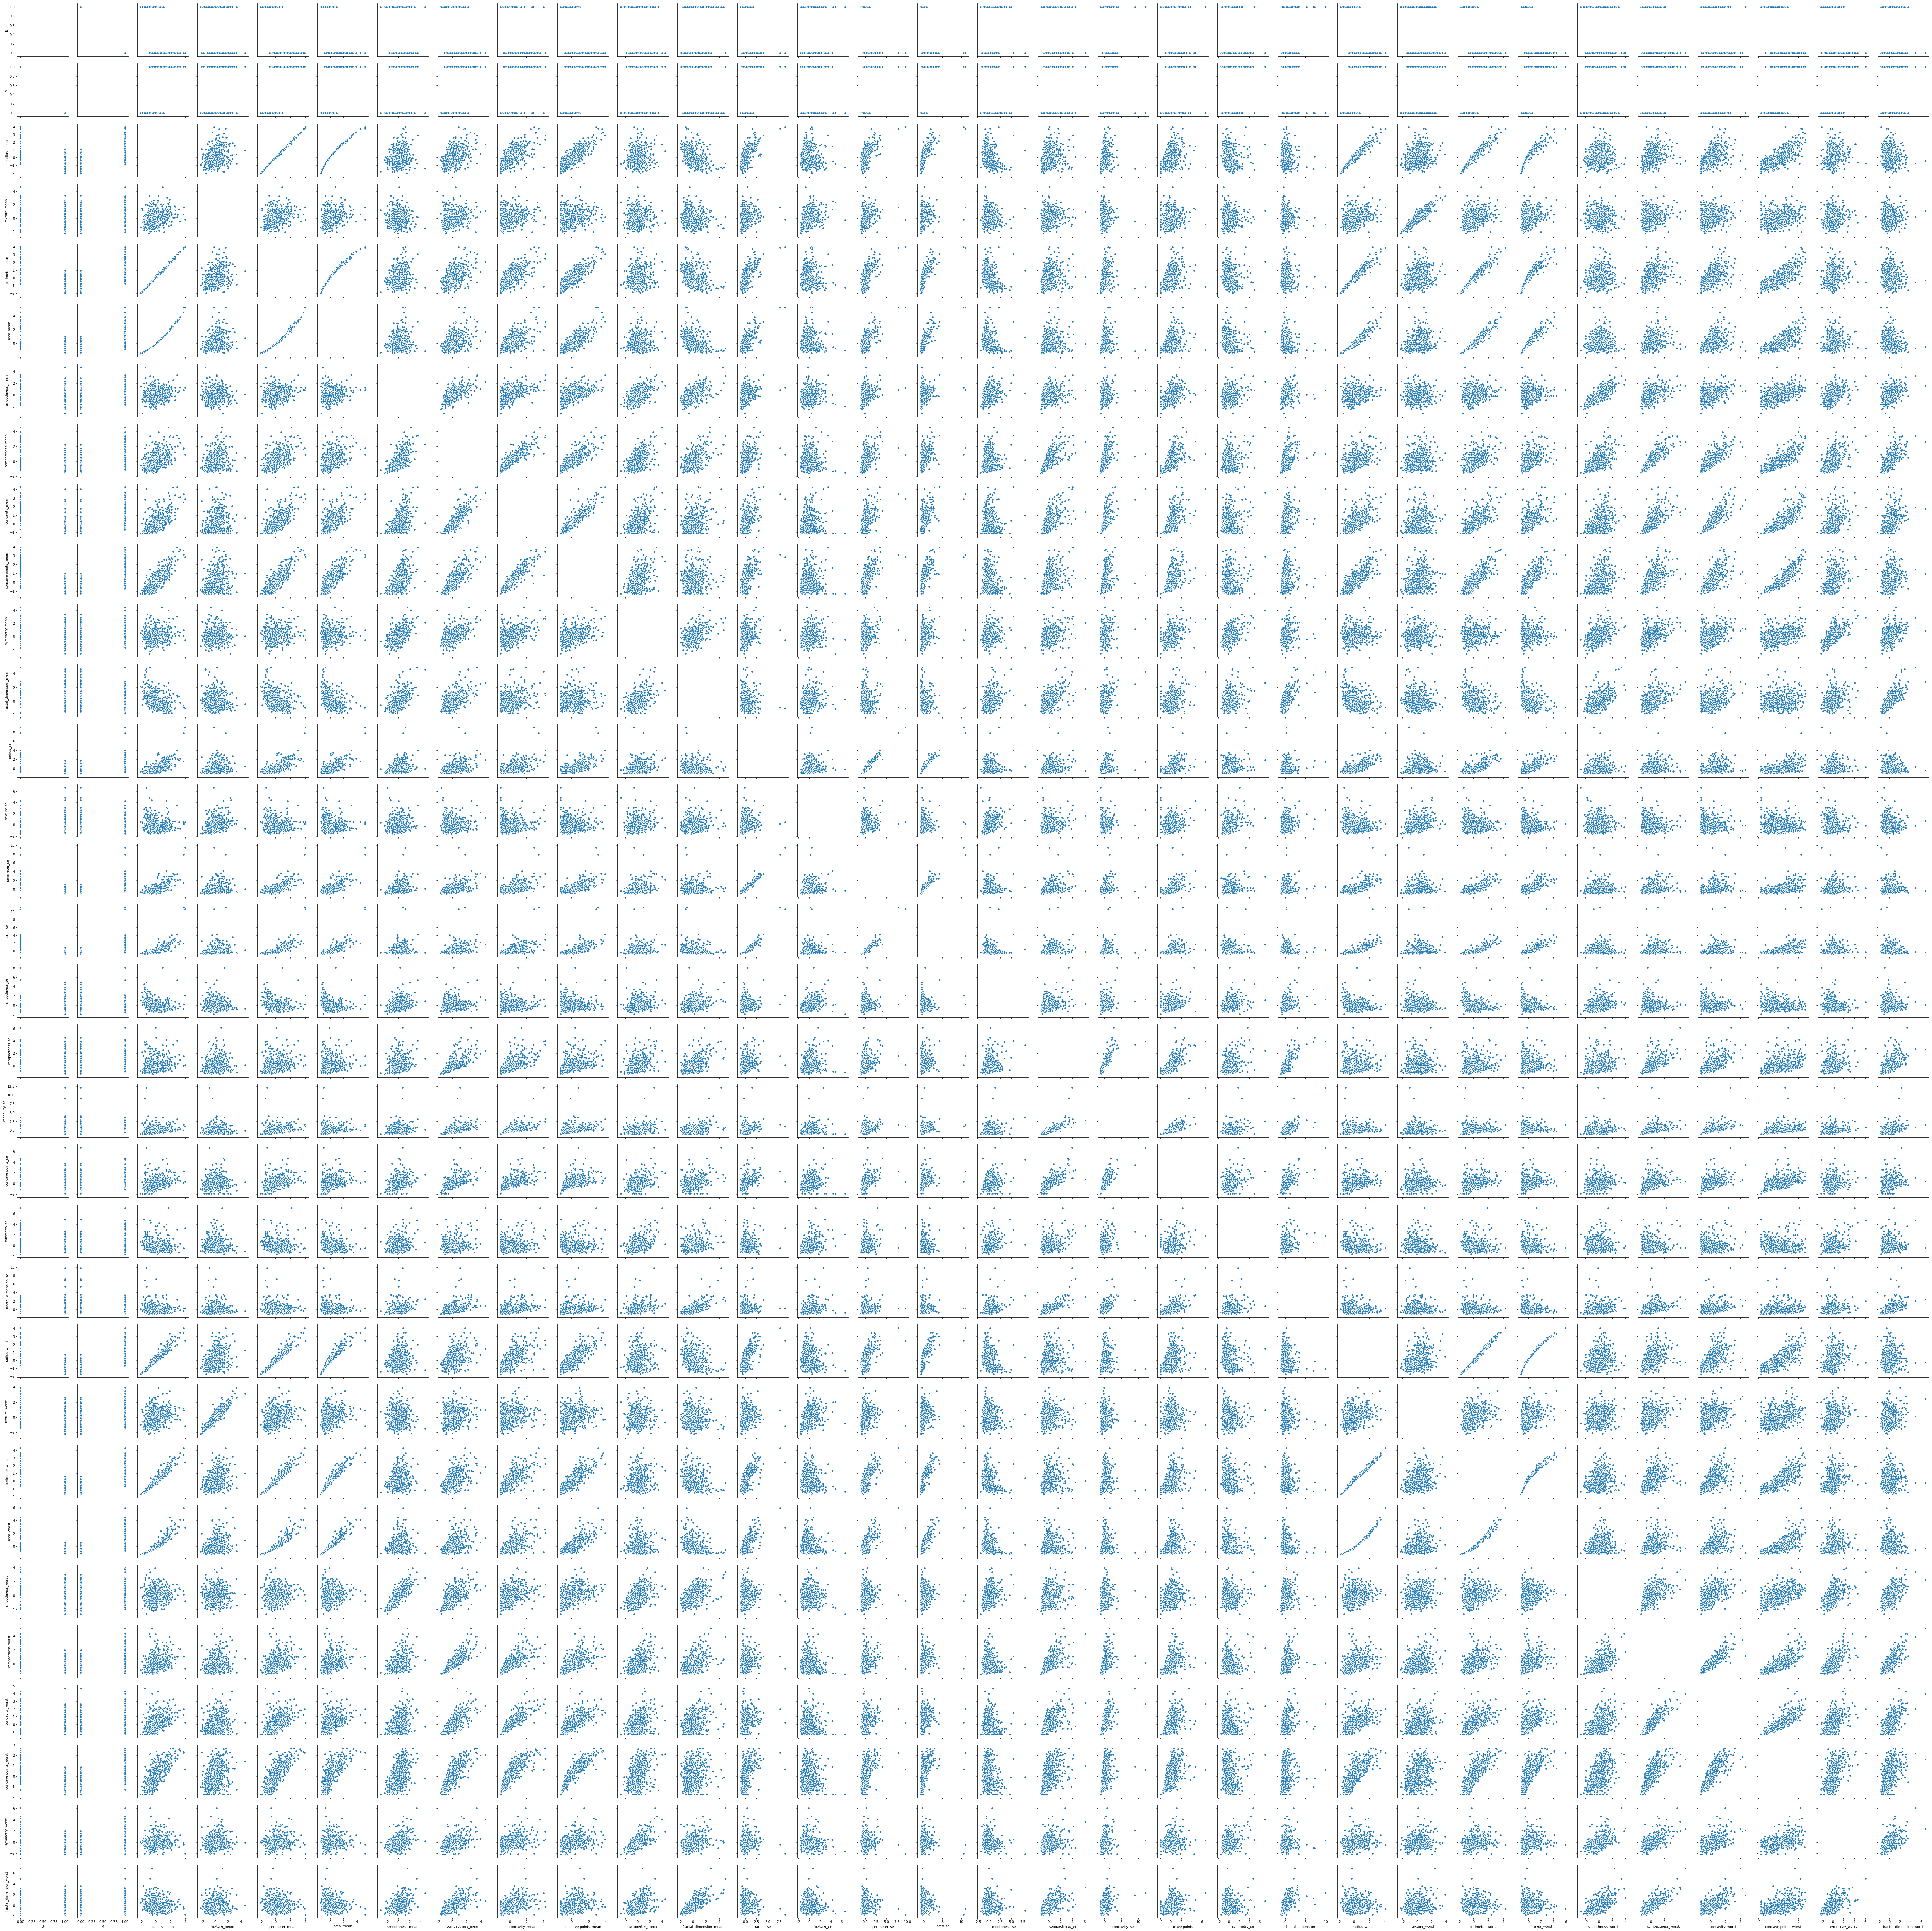

In [73]:
# Create a pair plot
sns.pairplot(data_refined, kind='scatter', diag_kind='auto')

# Show the plot
plt.show()

In [77]:
# Correlation heat map
print((data_refined.corr()))

                                B         M  radius_mean  texture_mean  \
B                        1.000000 -1.000000    -0.730029     -0.415185   
M                       -1.000000  1.000000     0.730029      0.415185   
radius_mean             -0.730029  0.730029     1.000000      0.323782   
texture_mean            -0.415185  0.415185     0.323782      1.000000   
perimeter_mean          -0.742636  0.742636     0.997855      0.329533   
area_mean               -0.708984  0.708984     0.987357      0.321086   
smoothness_mean         -0.358560  0.358560     0.170581     -0.023389   
compactness_mean        -0.596534  0.596534     0.506124      0.236702   
concavity_mean          -0.696360  0.696360     0.676764      0.302418   
concave points_mean     -0.776614  0.776614     0.822529      0.293464   
symmetry_mean           -0.330499  0.330499     0.147741      0.071401   
fractal_dimension_mean   0.012838 -0.012838    -0.311631     -0.076437   
radius_se               -0.567134  0.5

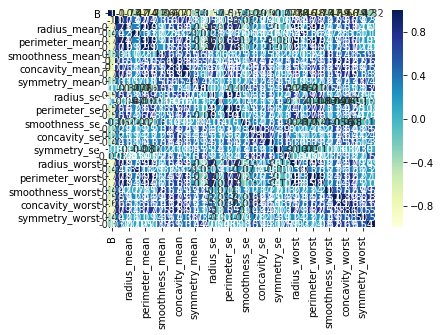

In [84]:
# plotting correlation heatmap 
dataplot = sns.heatmap(data_refined.corr(), cmap="YlGnBu", annot=True) 
  
# displaying heatmap 
plt.show() 

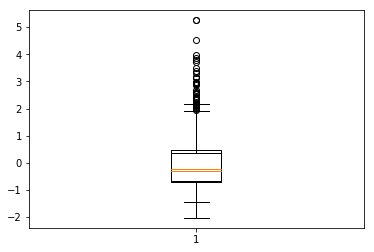

In [87]:
# Create a figure and an axis
fig, ax = plt.subplots()

# Plot a boxplot on the axis
ax.boxplot(data_refined.radius_mean)

# Show the figure
plt.show()

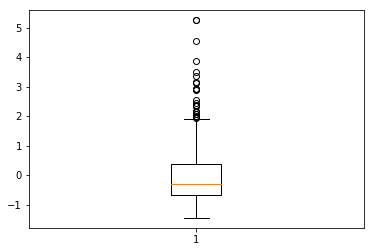

In [88]:
# Create a figure and an axis
fig, ax = plt.subplots()

# Plot a boxplot on the axis
ax.boxplot(data_refined.area_mean)

# Show the figure
plt.show()

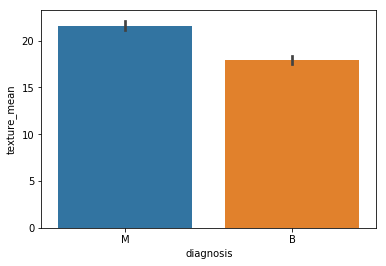

In [89]:
# Bar diagram texture_mean
sns.barplot(x='diagnosis', y="texture_mean", data=df)

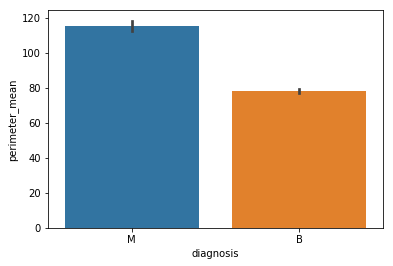

In [92]:
# Bar diagram texture_mean
sns.barplot( x= 'diagnosis',y="perimeter_mean", data=df)

Step 6 Challenge Yourself

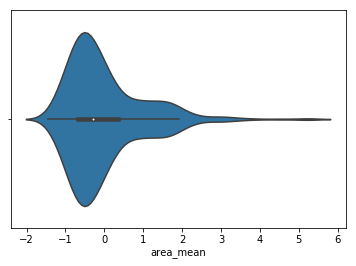

In [93]:
#Visualize your data in violin plots.
sns.violinplot(x=data_refined["area_mean"])

75 % of data spread btw -2 to 0.5 range (Q3-Q1)
Q2 qurtal is near 0 area mean


Area mean have outliers till 6 area means, 95% of data fall -2 to 3 region